# SMOTE- Entropy

## Synthetic Minority Oversampling Technique (SMOTE) with 'entropy' as criterion for best split. 

Importing important libraries and modules. 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import tree

Loading the data into dataframe. Extracting the features and class varibales as well as fraud data. 

In [2]:
data = pd.read_csv('https://people.rit.edu/~hvp4259/project/data/creditcard.csv')
print(data.shape)
X = data.ix[:, data.columns != 'Class']
y = data.ix[:, data.columns == 'Class']
fraud_record = data[data.Class == 1]
y_fraud_record = fraud_record.ix[:, fraud_record.columns == 'Class']
x_fraud_record = fraud_record.ix[:, fraud_record.columns != 'Class']
number_records_fraud = len(data[data.Class == 1])


(284807, 31)


Defining the utility function called plot_confusion_matrix for displaying the confusion matrix in a nice UI.

In [3]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Defining the utility function called show_data for displaying precision, recall and accuracy from the confusion matrix.

In [4]:
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.5f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.5f}'.format(tp/(tp+fn)))
        print('Accuracy =  {:.5f}'.format((tp+tn)/(tp+tn+fp+fn)))
    return tp/(tp+fp), tp/(tp+fn)

Definign the utility function called data_preparation for splitting the data into test and trainign datasets. 

In [5]:
def data_prepration(x):
    x_features= x.ix[:,x.columns != "Class"]
    x_labels=x.ix[:,x.columns=="Class"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.3)
    print("length of training data")
    print(len(x_features_train))
    print("length of test data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

Preparing the data, splitting it into test and training dataset. 

In [6]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(data)
columns = data_train_X.columns
print("Proportion of Normal data in training data is ",len(data_train_y[data_train_y["Class"]==0])/len(data_train_X))
print("Proportion of fraud data in training data is ",len(data_train_y[data_train_y["Class"]==1])/len(data_train_X))

length of training data
199364
length of test data
85443
Proportion of Normal data in training data is  0.998194257739612
Proportion of fraud data in training data is  0.001805742260388034


Oversampling the highly disbalanced prepared data and balancing the training dataset with the nornal : fraud data ratio 0.5 : 0.5. 

In [7]:
os = SMOTE(random_state = 0)
os_data_X, os_data_y = os.fit_sample(data_train_X, data_train_y.values.ravel())
os_data_X = pd.DataFrame(data = os_data_X, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ["Class"])
print("length of oversampled data is ",len(os_data_X))
print("Number of normal transcation in oversampled data",len(os_data_y[os_data_y["Class"]==0]))
print("Number of fraud transcation",len(os_data_y[os_data_y["Class"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Class"]==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y["Class"]==1])/len(os_data_X))

length of oversampled data is  398008
Number of normal transcation in oversampled data 199004
Number of fraud transcation 199004
Proportion of Normal data in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


Training the model with RandomForestClassifier having 100 trees in the forest with criterion for best split as 'entropy'.

In [8]:
clf= RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
clf.fit(os_data_X, os_data_y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Saving all 100 trees to the local drive in .dot format. 

In [9]:
#i_tree = 0
#for tree_in_forest in clf.estimators_:
#    with open('F:/RIT/Sem 2/AT/random_forest_entropy/tree_' + str(i_tree) + '.dot', 'w') as my_file:
#        my_file = tree.export_graphviz(tree_in_forest, out_file = my_file)
#    i_tree = i_tree + 1

Applying the model on test data.

[[85290    21]
 [   25   107]]


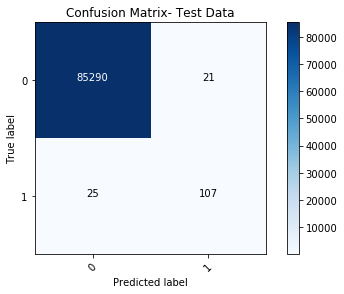

Precision =     0.83594
Recall (TPR) =  0.81061
Accuracy =  0.99946


In [10]:
pred = clf.predict(data_test_X)
cm = confusion_matrix(data_test_y.values.ravel(), pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Test Data')
pr, tpr = show_data(cm, print_res = 1);

Applying the model on the entire dataset. 

[[284294     21]
 [    25    467]]


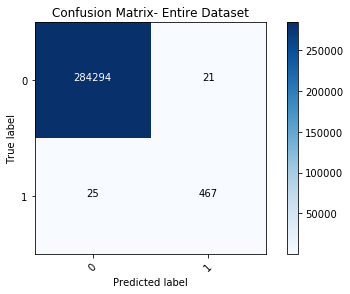

Precision =     0.95697
Recall (TPR) =  0.94919
Accuracy =  0.99984


In [11]:
pred = clf.predict(X)
cm = confusion_matrix(y, pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Entire Dataset')
pr, tpr = show_data(cm, print_res = 1);

Applying the model on only the fraud data instances. 

[[  0   0]
 [ 25 467]]


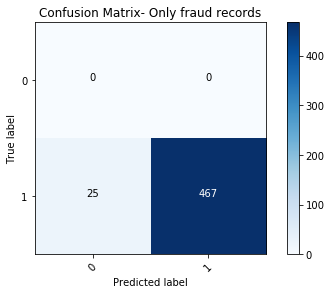

Precision =     1.00000
Recall (TPR) =  0.94919
Accuracy =  0.94919


In [12]:
pred = clf.predict(x_fraud_record)
cm = confusion_matrix(y_fraud_record, pred)
print(cm)
plot_confusion_matrix(cm, ['0', '1'], title = 'Confusion Matrix- Only fraud records')
pr, tpr = show_data(cm, print_res = 1);